# About NarsLKaggle_sub_17_Interaction_features
- This is the Jupyter notebook of the 10th model along the way. 
- The prediction of this model is produce the best score among all 16 models.
- This model begins with loading data from **df_train_sub9.csv'**
    - The dataset is the ned relut of 9th model with interaction featres added
    - The dummy fields of neighborhoor are excluded from the feature list 
    - Neighbhoorhood dummies are replaced by the field nb_ranking
        - NB_ranking is a manually assigned numeric field 
        - The number assigned is based on the highest and lowest price range of the neighborhood. 
        - By adding this field, the intention is to 
- In this model, there is a list of interact features added to the dataset.

# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

pd.options.display.max_columns = 120
pd.options.display.max_rows = 3000

# Loading data

In [2]:
df = pd.read_csv('../project_2/df_train_sub10.csv')

In [3]:
df.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,fbxgrla,frxgrla,nb_ranking,nbrkxgla,carsxara
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2958,0,1.4,2070.6,950.0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4244,2122,2.0,4244.0,1118.0


In [4]:
df.shape

(2050, 113)

# Handle null values

In [7]:
df.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,fbxgrla,frxgrla,nb_ranking,nbrkxgla,carsxara
count,2050.000000,2.050000e+03,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2049.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2049.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.00000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.00000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,1474.098049,7.134975e+08,57.026829,57.924390,10067.220488,6.113171,5.561463,1971.721463,1984.206829,98.674634,442.300488,47.959024,567.728293,1057.987805,1164.619024,329.489756,5.515610,1499.624390,0.427317,0.063446,1.577561,0.371220,2.843902,1.042927,6.437073,0.591220,1868.688293,1.776964,473.535122,93.879512,47.580000,22.582927,2.592683,16.519512,2.399024,51.599512,6.220976,2007.775610,181519.686829,0.002927,0.009268,0.036585,0.013171,0.087805,0.034634,0.069756,0.056585,0.001463,0.000976,0.033659,0.000488,0.011707,0.040000,0.15122,0.008293,0.042439,0.023415,0.059512,0.079512,0.01561,0.054146,0.042439,0.063415,0.018537,0.023415,0.008293,2535.272195,1033.008293,2.022415,3153.802293,988.764878
std,844.181724,1.886914e+08,42.826865,33.132999,6743.517958,1.425855,1.104310,30.179906,21.027815,174.353604,461.204124,165.000901,444.954786,449.410704,396.499270,425.712712,51.081185,500.392368,0.522631,0.251705,0.549265,0.501098,0.826610,0.209839,1.559677,0.638539,454.241249,0.764531,216.145575,128.564062,66.755256,59.857633,25.235706,57.387043,37.791752,573.532756,2.744967,1.312325,79245.655820,0.054034,0.095848,0.187787,0.114033,0.283080,0.182896,0.254798,0.231105,0.038236,0.031227,0.180393,0.022086,0.107591,0.196007,0.35835,0.090708,0.201638,0.151253,0.236639,0.270603,0.12399,0.226361,0.201638,0.243767,0.134914,0.151253,0.090708,1556.338007,1300.991420,0.537710,1676.941192,739.510012
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,450.900000,0.000000
25%,75

In [10]:
df['ms_zoning'].value_counts()

RL         1598
RM          315
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

In [11]:
df['msz_ranking'] = df['ms_zoning'].map({'RL':7, 'RM':6, 'FV': 5, 'C (all)': 4,
                                          'RH':3, 'A (agr)':2, 'I (all)': 1})

In [13]:
df['msz_ranking'].describe()

count    2050.000000
mean        6.684878
std         0.697353
min         1.000000
25%         7.000000
50%         7.000000
75%         7.000000
max         7.000000
Name: msz_ranking, dtype: float64

df['fbxgrla'] = df['full_bath'] * df['gr_liv_area']

df['frxgrla'] = df['fireplaces'] * df['gr_liv_area']

df.shape

# Clean-up and EDA

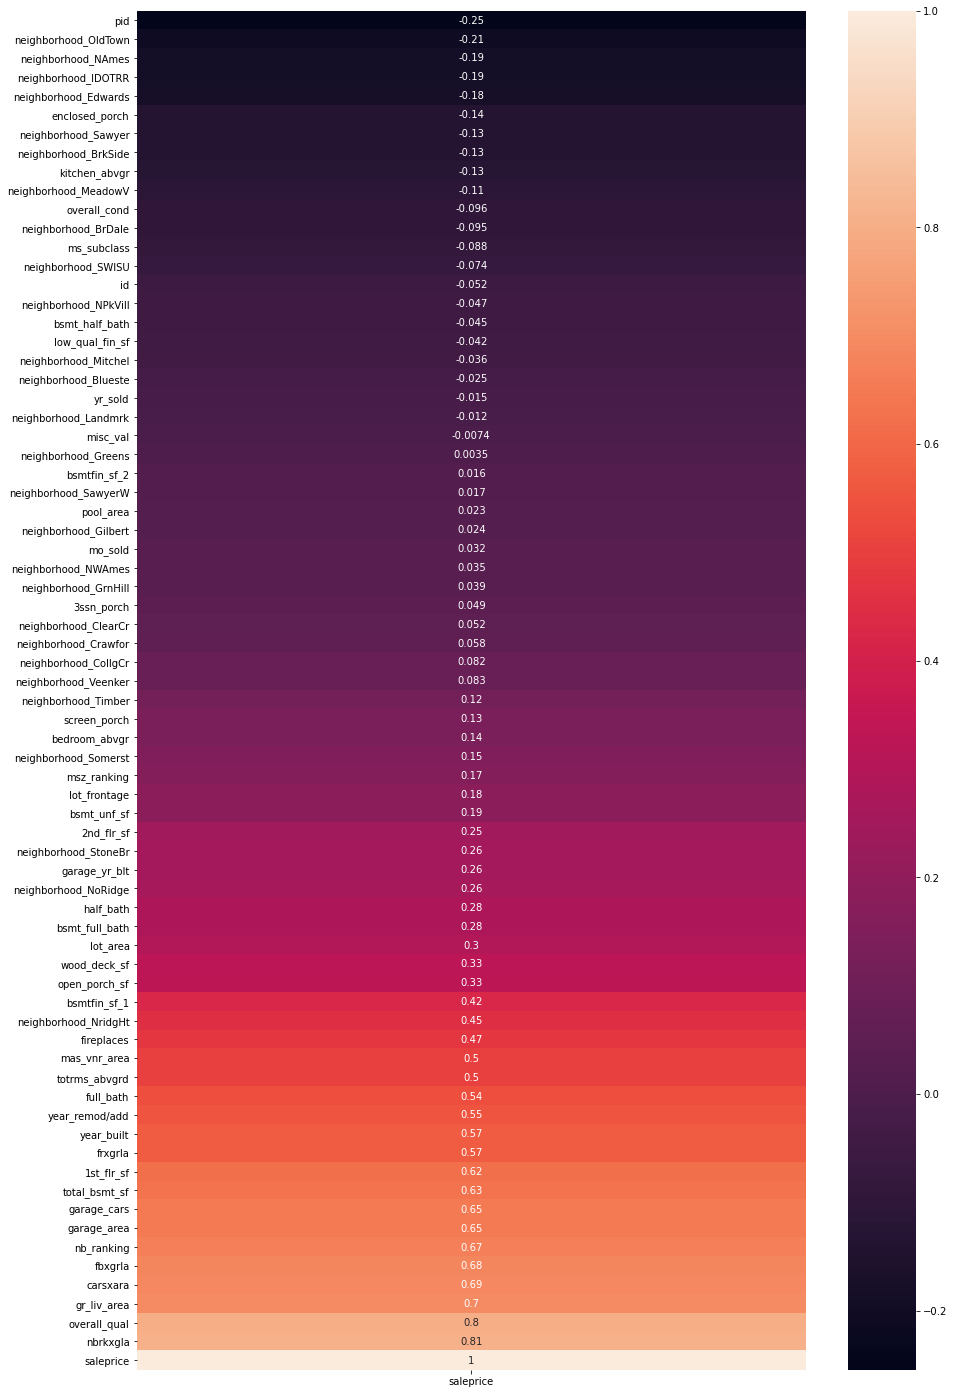

In [12]:
# sns.heatmap(df.corr()[['bpm']].sort_values('bpm'), annot = True)
plt.figure(figsize = (15, 25))

sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice'), annot = True);

In [ ]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['nbrkxgla','overall_qual', 'nb_ranking', 'gr_liv_area', 'fbxgrla'])

In [ ]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['garage_area', 'total_bsmt_sf','1st_flr_sf', 'frxgrla'])

In [ ]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['year_built', 'year_remod/add', 'totrms_abvgrd', 'garage_cars'])

nb_dum_list = ['neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr',
               'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert',
               'neighborhood_Greens', 'neighborhood_GrnHill', 'neighborhood_IDOTRR', 'neighborhood_Landmrk',
               'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes', 'neighborhood_NPkVill', 
               'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown',
               'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst',
               'neighborhood_StoneBr', 'neighborhood_Timber','neighborhood_Veenker']

nb_name = []
for nb in nb_dum_list:
    nb.split('_')[1]
    nb_name.append(nb.split('_')[1])

nb_name

df['nb_ranking'] = df['neighborhood'].map({'Blueste':1.6, 'BrDale':1, 'BrkSide': 1.35, 'ClearCr': 2.35,
                                          'CollgCr':2.5, 'Crawfor':2.5, 'Edwards': 1.7, 'Gilbert': 2.1,
                                           'Greens': 1.95, 'GrnHill':3, 'IDOTRR':1.05, 'Landmrk':1.5,
                                           'MeadowV':1.25, 'Mitchel':1.45, 'NAmes':1.9, 'NPkVill':1.35,
                                           'NWAmes':2.05, 'NoRidge':3.4, 'NridgHt':2.7, 'OldTown':1.85,
                                           'SWISU':1.45, 'Sawyer':1.4, 'SawyerW':2, 'Somerst':2.15,
                                           'StoneBr':3.6, 'Timber':2.85, 'Veenker':2.6, 'Blmngtn':2.1})

df['nb_ranking'].sort_values().value_counts()

df['carsxara'] = df['garage_cars'] * df['garage_area']

df['nbrkxgla'].isnull().sum()

df[df['nbrkxgla'].isnull()]

df.shape

df.head(3)

<font size=3 color= green><b>The following three lines of code are for neighborhood reviewing.</b></font>

sns.pairplot(df, y_vars=['saleprice'], x_vars=['neighborhood_BrkSide'])

sns.pairplot(df, y_vars=['saleprice'], x_vars=['neighborhood_Timber',
 'neighborhood_Veenker'])

df['garage_finish'].describe()

In [ ]:
df['carsxara'].value_counts()

In [ ]:
df[df['carsxara'].isnull()]

In [ ]:
df['carsxara'] = df['carsxara'].replace(np.nan, 0)

<font size=3 color= green><b>The following three lines of code are for single column reviewing.</b></font>

- Should I drop df['garage_yr_blt'] == 0?
- drop df['mas_vnr_area'].isnull()? x22

df['bsmt_full_bath'] = df['bsmt_full_bath'].fillna(0)

df['bsmt_full_bath'].isnull().sum()

df['bsmt_full_bath'].describe()

df['full_bath'].value_counts()

In [ ]:
df.to_csv('df_train_sub18.csv', index = False)

# Define Feature Matrix & Target

In [ ]:
features = ['nbrkxgla','overall_qual', 'nb_ranking', 'gr_liv_area', 'fbxgrla', 'total_bsmt_sf',
            '1st_flr_sf', 'frxgrla', 'year_built', 'year_remod/add', 'totrms_abvgrd', 'carsxara', 'neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_BrkSide',
 'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 'neighborhood_GrnHill',
 'neighborhood_IDOTRR',
 'neighborhood_Landmrk',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NPkVill',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Somerst',
 'neighborhood_StoneBr',
 'neighborhood_Timber',
 'neighborhood_Veenker']

In [ ]:
df[features].isnull().sum()

In [ ]:
y = df['saleprice']
X = df[features]

import statsmodels.api as sm

## Dan doing it this way to mimic sklearn 

X = sm.add_constant(X, prepend=True)
    ## adding constant 1 
results = sm.OLS(y, X).fit()

results.summary()

#### Train-Test-Split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 308)

## Standardscaler transform

ss = StandardScaler()

ss.fit(X_train)

X_train_sc = ss.transform(X_train)

X_valid_sc = ss.transform(X_valid)

#### Instantiate, Fit, Score Model

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
cross_val_score(lr, X_train, y_train)

In [ ]:
cross_val_score(lr, X_train, y_train).mean()

In [ ]:
cross_val_score(lr, X_valid, y_valid)

In [ ]:
cross_val_score(lr, X_valid, y_valid).mean()

In [ ]:
lr.score(X_train, y_train), lr.score(X_valid, y_valid)

In [ ]:
list(zip(X.columns, lr.coef_))

#### Now we have a model object, and we can run our df_test data through it

# Prep df_test data

In [ ]:
df_test = pd.read_csv('../project_2/df_test_sub10.csv')

In [ ]:
df_test.shape

In [ ]:
df_test.describe()

In [ ]:
df_test['carsxara'] = df_test['garage_cars'] * df_test['garage_area']

df_test['nb_ranking'] = df_test['neighborhood'].map({'Blueste':1.6, 'BrDale':1, 'BrkSide': 1.35, 'ClearCr': 2.35,
                                          'CollgCr':2.5, 'Crawfor':2.5, 'Edwards': 1.7, 'Gilbert': 2.1,
                                           'Greens': 1.95, 'GrnHill':3, 'IDOTRR':1.05, 'Landmrk':1.5,
                                           'MeadowV':1.25, 'Mitchel':1.45, 'NAmes':1.9, 'NPkVill':1.35,
                                           'NWAmes':2.05, 'NoRidge':3.4, 'NridgHt':2.7, 'OldTown':1.85,
                                           'SWISU':1.45, 'Sawyer':1.4, 'SawyerW':2, 'Somerst':2.15,
                                           'StoneBr':3.6, 'Timber':2.85, 'Veenker':2.6, 'Blmngtn':2.1})

df_test['nb_ranking'].sort_values().value_counts()

df_test['nbrkxgla'] = df_test['nb_ranking'] * df_test['gr_liv_area']

df_test['fbxgrla'] = df_test['full_bath'] * df_test['gr_liv_area']

df_test['frxgrla'] = df_test['fireplaces'] * df_test['gr_liv_area']

In [ ]:
df_test[features].isnull().sum()

In [ ]:
df_test.to_csv('df_test_sub18.csv', index = False)

In [ ]:
df_test.shape

#### Make sure there aren't any nulls in the columns we used in the model:

In [ ]:
df_test[features].isnull().sum()

In [ ]:
list(df_test.columns)

In [ ]:
X_TEST = df_test[features]

X_TEST_SC = ss.transform(X_TEST)

#### Create Predictions

In [ ]:
df_test['y_hat'] = lr.predict(X_TEST)

In [ ]:
df_test.head()

In [ ]:
df_test.shape

# Create Submission

In [ ]:
nars_submission = df_test[['id', 'y_hat']]

# View Correct Submission Format

In [ ]:
nars_submission.head()

In [ ]:
nars_submission.shape

# Rename columns of the fisrt submission

In [ ]:
nars_submission.rename(columns = {'id' : 'Id',
                                     'y_hat' : 'SalePrice'}, inplace = True)

In [ ]:
nars_submission.shape

In [ ]:
nars_submission.head()

#### Export as a CSV

In [ ]:
nars_submission.to_csv('nars_submission_18.csv', index = False)

# Sample submission reference

sample_submission = pd.read_csv('sample_sub_reg.csv')
sample_submission.shape

sample_submission.head()

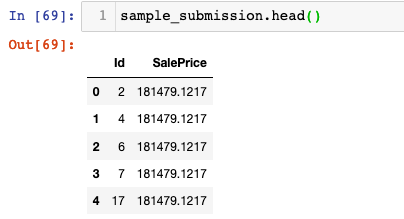